In [1]:
# Importing libraries

import numpy as np
import pandas as pd
from random import seed
from random import randrange
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
# Loading data

read_file = pd.read_csv (r'D:\COURSES\Winter 2021 courses\Intelligent Analytics\HW1\Two_Class_Gaussian_Data.csv')
# read_file = pd.read_csv (r'D:\COURSES\Winter 2021 courses\Intelligent Analytics\HW1\Two_Class_Uniform_Data.csv')
read_file.head()
dataset=read_file

In [3]:
# Reading Feature inputs
X = dataset.iloc[:,0:-1]
X

,X1,X2
0,-0.2418,-0.8484
1,-1.6919,1.0404
2,-0.3198,0.6226
3,-2.0725,-0.7876
4,-0.1002,0.4883
...,...,...
495,2.0073,-0.3900
496,1.3034,2.3219
497,0.1829,0.9806
498,0.5088,1.3952


In [4]:
# Reading Labels outputs
Y = dataset.iloc[:,-1]
Y

0      0
1      0
2      0
3      0
4      0
      ..
495    1
496    1
497    1
498    1
499    1
Name: Y, Length: 500, dtype: int64

In [5]:
# Splitting data to train and test in ratio 75:25
X_train, X_test , Y_train, Y_test=train_test_split(X,Y, test_size=0.25, random_state=123)
X_train.head()

,X1,X2
455,-0.6349,2.1519
384,0.5647,0.3477
293,1.2333,0.0895
421,-0.2437,0.3208
374,1.2187,-0.0073


In [6]:
# Converting data into array

X=X_train.to_numpy() 
d=Y_train.to_numpy()
x1= X_test.to_numpy()
d1= Y_test.to_numpy()
d1.shape

(125,)

In [7]:
# Implementing Single Layer Perceptron

class Perceptron(object):
    """Implementing a perceptron"""
    def __init__(self, i_size, l_rate=0.1, epochs=100):
        self.w = np.zeros(i_size+1)
        # adding bias
        self.epochs = epochs
        self.l_rate = l_rate
    def activation_fn(self, x):
        return 1 if x >= 0 else 0
 
    def predict(self, x):
        z = self.w.T.dot(x)
        a = self.activation_fn(z)
        return a
 
    def fit(self, X, d):
        for _ in range(self.epochs):
            for i in range(d.shape[0]):
                x = np.insert(X[i],0,1)
                y = self.predict(x) 
                e = d[i] - y
                self.w = self.w + self.l_rate * e * x
                
    def slp(self, testing):
        preds = list()
        weights = perceptron.w
        for i in range(testing.shape[0]):
            t=np.insert(testing[i],0,1)
            pred = self.predict(t)
            preds.append(pred)
        return(preds)  

In [8]:
if __name__ == '__main__':

    perceptron = Perceptron(i_size=2)
    perceptron.fit(X, d)
    print(perceptron.w)
    pred=perceptron.slp(x1)

[-0.1      0.56853  0.28038]


In [9]:
perceptron.w[0]

-0.10000000000000003

In [10]:
# Calculating Accuracy
def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual)) * 100.0
accuracy_metric(d1, pred)

98.4

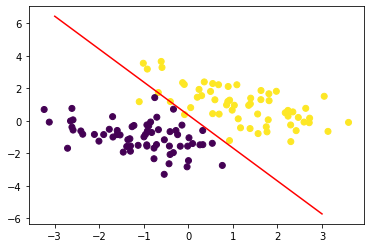

In [11]:
# Plotting graph

w0=perceptron.w[1]
w1=perceptron.w[2]
b=perceptron.w[0]
plt.scatter(x1[ : ,0], x1[ :,1] , c=d1)
x=np.linspace(-3, 3,10)
Y=(-(b/w1)/(b/w0))*x +(-b/w1)
plt.plot(x,Y,'-r')
